# Use basic ML methods for img recognition
by Jenny Zeng & Ariel

In [1]:
%pylab inline
import mltools as ml
plt.style.use('ggplot')
from sklearn.learning_curve import validation_curve
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve,GridSearchCV, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn import tree, preprocessing


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


denote number of data    
mesa: 10015    
forest: 10047   
desert: 10142  
training size: 21142  
test size: 9062  
total size:  30204

In [2]:
data = np.loadtxt('/notebooks/Minecraft-AI/mc-data/mesa_forest_desert.txt', delimiter=';')
np.random.shuffle(data)
X = data[:,:-1]
Y = data[:,-1].astype(np.int64)
data_scaler = preprocessing.StandardScaler().fit(X)
X_scaled = data_scaler.transform(X)
# Xtr, Ytr = X_scaled, Y
#Xtr, Ytr = X, Y
Xtr, Xte, Ytr, Yte = ml.splitData(X_scaled,Y,train_fraction=0.8)

In [3]:
X = data[:,:-1]
X
X.shape

(30204, 24)

In [4]:
data = np.loadtxt('/notebooks/Minecraft-AI/mc-data/mesa_forest_desert_jungle_eh.txt', delimiter=';')
np.random.shuffle(data)
X = data[:,:-1]
Y = data[:,-1].astype(np.int64)
data_scaler = preprocessing.StandardScaler().fit(X)
X_scaled = data_scaler.transform(X)
# Xtr, Ytr = X_scaled, Y
#Xtr, Ytr = X, Y
Xtr, Xte, Ytr, Yte = ml.splitData(X_scaled,Y,train_fraction=0.8)

In [ ]:
print X_scaled[0]
print X[0]

In [ ]:
Xtr

## helper functions

In [5]:
def convertLabel(lab):
    return (numpy.arange(5) == lab[:, None]).astype(numpy.float32)

In [6]:
# show degree change cross validation curve
def plot_validation_curve_lin(train_scores, test_scores, title, xlabel,param_range):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print("max mean test_score: ", test_scores_mean)
    print("test_scores std: ", test_scores_std)
    maxIndex = np.argmax(test_scores_mean)
    print("best mean test_score:", max(test_scores_mean)," at", maxIndex, " that is", param_range[maxIndex])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
#     plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.legend(loc="best")
    plt.show()
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [7]:
# show degree change cross validation curve
def plot_validation_curve_log(train_scores, test_scores, title, xlabel, param_range, logbase=10):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print("max mean test_score: ", test_scores_mean)
    maxIndex = np.argmax(test_scores_mean)
    print("best mean test_score:", max(test_scores_mean)," at", maxIndex, " that is", param_range[maxIndex])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw,basex=logbase)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.legend(loc="best")
    plt.show()
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw,basex=logbase)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [8]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=make_scorer(roc_auc_score),
        n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Decision tree 

### change depth

In [ ]:
param_range =np.arange(8,30)
train_scores, test_scores = validation_curve(
    tree.DecisionTreeClassifier(), Xtr, Ytr, param_name="max_depth", param_range=param_range,
    cv=10, scoring=make_scorer(roc_auc_score), n_jobs=3)

In [ ]:
plot_validation_curve_lin(train_scores, test_scores, "Validation curve Decision Tree (max_depth)", "max_depth",param_range)

In [ ]:
parameters = {"max_depth":[13]}
svr = tree.DecisionTreeClassifier()
clf = GridSearchCV(svr, parameters,scoring=make_scorer(roc_auc_score),n_jobs=5)
clf.fit(Xtr, Ytr)

In [ ]:
clf.best_score_

# Random Forest

In [21]:
data = np.loadtxt('/notebooks/Minecraft-AI/mc-data/pig_binary.txt', delimiter=';')
np.random.shuffle(data)
Xp = data[:,:-1]
Yp = data[:,-1].astype(np.int64)
data_scaler = preprocessing.StandardScaler().fit(Xp)
Xp_scaled = data_scaler.transform(Xp)
# Xtr, Ytr = X_scaled, Y
#Xtr, Ytr = X, Y
Xptr, Xpte, Yptr, Ypte = ml.splitData(Xp_scaled,Yp,train_fraction=0.8)

In [ ]:
param_range =np.linspace(330,360,5, dtype="int")
train_scores, test_scores = validation_curve(
    RandomForestClassifier(criterion="gini",
    max_features=4,
    max_depth=14,
    min_samples_split=8,
    min_samples_leaf=4,
    class_weight="balanced"
                          ), Xptr, Yptr, param_name="n_estimators", param_range=param_range,
    cv=10, scoring=make_scorer(roc_auc_score), n_jobs=5)


In [ ]:
plot_validation_curve_lin(train_scores, test_scores, "Cross validation curve Random forest (n_estimators)", "n_estimators",param_range)

# Gradient boosting

In [ ]:
param_range =np.linspace(284,290,5,dtype='int')
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(
        loss='deviance', 
        subsample=0.83, 
        min_impurity_split=1e-04,
        max_features=8,
        max_depth=14,
        min_samples_split=14,
        min_samples_leaf=8,
        learning_rate=0.15,
        random_state=1
    ), Xtr, Ytr, param_name="n_estimators", param_range=param_range,
    cv=10, scoring=make_scorer(roc_auc_score), n_jobs=5)


In [ ]:
plot_validation_curve_lin(train_scores, test_scores, "Cross validation curve GradientBoosting (n_estimators)", "n_estimators",param_range)

# multi-class

# Random forest

In [9]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np
NUM_LABELS=5

In [10]:
def error_rate(predictions, labels):
    """Return the error rate and confusions."""
    correct = numpy.sum(numpy.argmax(predictions, 1) == numpy.argmax(labels, 1))
    total = predictions.shape[0]

    error = 100.0 - (100 * float(correct) / float(total))

    confusions = numpy.zeros([NUM_LABELS, NUM_LABELS], numpy.float32)
    bundled = zip(numpy.argmax(predictions, 1), numpy.argmax(labels, 1))
    for predicted, actual in bundled:
        confusions[predicted, actual] += 1
    
    return error, confusions

print('Done')

Done


In [11]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=5)
r=multi_target_forest.fit(Xtr, convertLabel(Ytr))
result=r.predict(Xte)




In [12]:
test_error,confusions=error_rate(result, convertLabel(Yte))

In [20]:
test_error

5.603058042450456

Test error: 5.60305804245%


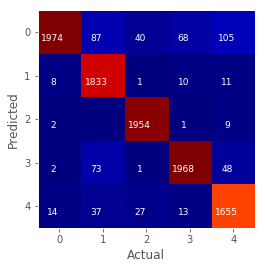

In [14]:
print('Test error: {}%'.format(test_error))

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(False)
plt.xticks(numpy.arange(5))
plt.yticks(numpy.arange(5))
plt.imshow(confusions, cmap=plt.cm.jet, interpolation='nearest');


for i, cas in enumerate(confusions):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')


In [35]:
data3 = np.loadtxt('/notebooks/Minecraft-AI/mc-data/mesa_forest_desert_jungle_eh_new.txt', delimiter=';')
np.random.shuffle(data3)
X3 = data3[:,:-1]
Y3= data3[:,-1].astype(np.int64)
data_scaler = preprocessing.StandardScaler().fit(X3)
X_scaled3 = data_scaler.transform(X3)
# Xtr, Ytr = X_scaled, Y
#Xtr, Ytr = X, Y
Xtr3, Xte3, Ytr3, Yte3 = ml.splitData(X_scaled3,Y3,train_fraction=0.8)

In [36]:
forest3 = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest3 = MultiOutputClassifier(forest3, n_jobs=5)
r3=multi_target_forest3.fit(Xtr3, convertLabel(Ytr3))
result3=r3.predict(Xte3)

In [37]:
test_error3,confusions3=error_rate(result3, convertLabel(Yte3))

Test error: 5.29621101109%


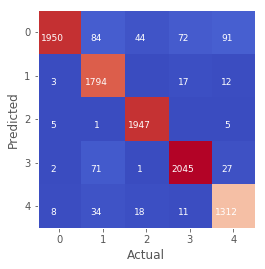

In [40]:
print('Test error: {}%'.format(test_error3))

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(False)
plt.xticks(numpy.arange(5))
plt.yticks(numpy.arange(5))
plt.imshow(confusions3, cmap=plt.cm.coolwarm, interpolation='nearest');


for i, cas in enumerate(confusions3):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')


# Pig data

In [22]:
data1 = np.loadtxt('/notebooks/Minecraft-AI/mc-data/pig_binary.txt', delimiter=';')
np.random.shuffle(data1)
Xp = data1[:,:-1]
Yp = data1[:,-1].astype(np.int64)
data_scaler = preprocessing.StandardScaler().fit(Xp)
Xp_scaled = data_scaler.transform(Xp)
# Xtr, Ytr = X_scaled, Y
#Xtr, Ytr = X, Y
Xptr, Xpte, Yptr, Ypte = ml.splitData(Xp_scaled,Yp,train_fraction=0.8)

In [27]:
param_range =np.linspace(330,360,5, dtype="int")
train_scores, test_scores = validation_curve(
    RandomForestClassifier(criterion="gini",
    max_features=4,
    max_depth=14,
    min_samples_split=8,
    min_samples_leaf=4,
    class_weight="balanced"
                          ), Xptr, Yptr, param_name="n_estimators", param_range=param_range,
    cv=10, scoring=make_scorer(roc_auc_score), n_jobs=5)


('max mean test_score: ', array([ 0.95982143,  0.95267857,  0.96607143,  0.95267857,  0.95892857]))
('test_scores std: ', array([ 0.05375712,  0.06939631,  0.04670249,  0.06939631,  0.06477985]))
('best mean test_score:', 0.96607142857142869, ' at', 2, ' that is', 345)


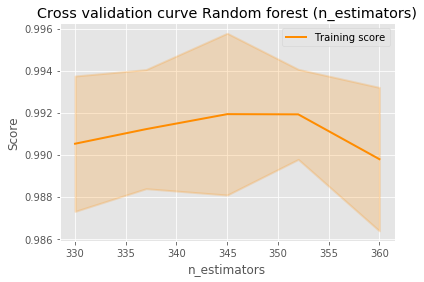

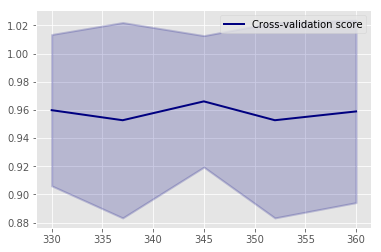

In [28]:
plot_validation_curve_lin(train_scores, test_scores, "Cross validation curve Random forest (n_estimators)", "n_estimators",param_range)

# Weather

In [47]:
data4 = np.loadtxt('/notebooks/Minecraft-AI/mc-data/normal_rain_thunder.txt', delimiter=';')
np.random.shuffle(data4)
X4 = data4[:,:-1]
Y4= data4[:,-1].astype(np.int64)
data_scaler = preprocessing.StandardScaler().fit(X4)
X_scaled4 = data_scaler.transform(X4)
# Xtr, Ytr = X_scaled, Y
#Xtr, Ytr = X, Y
Xtr4, Xte4, Ytr4, Yte4 = ml.splitData(X_scaled4,Y4,train_fraction=0.8)

In [52]:
forest4 = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest4 = MultiOutputClassifier(forest4, n_jobs=3)
r4=multi_target_forest4.fit(Xtr4, convertLabel(Ytr4))
result4=r4.predict(Xte4)

In [53]:
test_error4,confusions4=error_rate(result4, convertLabel(Yte4))

Test error: 59.7054886212%


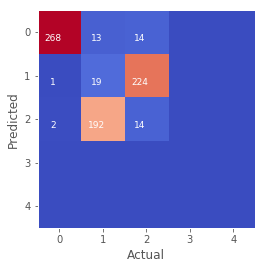

In [54]:
print('Test error: {}%'.format(test_error4))

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(False)
plt.xticks(numpy.arange(5))
plt.yticks(numpy.arange(5))
plt.imshow(confusions4, cmap=plt.cm.coolwarm, interpolation='nearest');


for i, cas in enumerate(confusions4):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')


# Gradient boosting

In [16]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=1)
multi_target_forest2 = MultiOutputClassifier(gb, n_jobs=5)
r2=multi_target_forest.fit(Xtr, convertLabel(Ytr))
result2=r2.predict(Xte)

In [17]:
test_error2,confusions2=error_rate(result2, convertLabel(Yte))

In [19]:
test_error2

5.603058042450456

Test error: 5.60305804245%


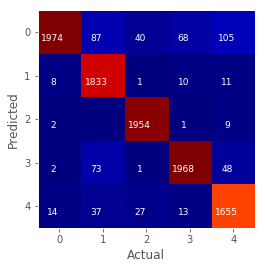

In [18]:
print('Test error: {}%'.format(test_error2))

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(False)
plt.xticks(np.arange(5))
plt.yticks(np.arange(5))
plt.imshow(confusions2, cmap=plt.cm.jet, interpolation='nearest');


for i, cas in enumerate(confusions2):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')


In [ ]:
np.savetxt('Yhat_sklearn.txt',
    np.vstack( (np.arange(len(Ytr)) , Ytr) ).T,
        '%d, %.2f',header='Index,Prob1',comments='',delimiter=',')

# More---Ensemble,gradient boosting and so on

In [ ]:

import time
start_time = time.time()
import numpy as np
import pandas as pd
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import grid_search
from sklearn.metrics import mean_squared_error, make_scorer

start_time = time.time()

In [ ]:
def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5

RMSE = make_scorer(mean_squared_error_, greater_is_better=False)


class Ensemble(object):
    def __init__(self, n_folds, stacker, base_models):
        self.n_folds = n_folds
        self.stacker = stacker
        self.base_models = base_models

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        folds = list(KFold(len(y), n_folds=self.n_folds, shuffle=True, random_state=2016))
        S_train = np.zeros((X.shape[0], len(self.base_models)))

        for i, clf in enumerate(self.base_models):

            print('Fitting For Base Model #%d / %d ---', i+1, len(self.base_models))
            for j, (train_idx, test_idx) in enumerate(folds):

                print('--- Fitting For Fold %d / %d ---', j+1, self.n_folds)

                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                # y_holdout = y[test_idx]
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_holdout)[:]
                S_train[test_idx, i] = y_pred

                print('Elapsed: %s minutes ---' % round(((time.time() - start_time) / 60), 2))

            print('Elapsed: %s minutes ---' % round(((time.time() - start_time) / 60), 2))

        print('--- Base Models Trained: %s minutes ---' % round(((time.time() - start_time) / 60), 2))

        clf = self.stacker
        clf.fit(S_train, y)

        print('--- Stacker Trained: %s minutes ---' % round(((time.time() - start_time) / 60), 2))

    def preidct(self, X):
        X = np.array(X)
        folds = list(KFold(len(X), n_folds=self.n_folds, shuffle=True, random_state=2016))
        S_test = np.zeros((X.shape[0], len(self.base_models)))

        for i, clf in enumerate(self.base_models):
            S_test_i = np.zeros((X.shape[0], len(folds)))
            for j, (train_idx, test_idx) in enumerate(folds):
                S_test_i[:, j] = clf.predict(X)[:]
            S_test[:, i] = S_test_i.mean(1)

        clf = self.stacker
        y_pred = clf.predict(S_test)[:]
        return y_pred

    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(KFold(len(y), n_folds=self.n_folds, shuffle=True, random_state=2016))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))

        for i, clf in enumerate(self.base_models):

            print('Fitting For Base Model #{0} / {1} ---'.format(i+1, len(self.base_models)))

            S_test_i = np.zeros((T.shape[0], len(folds)))

            for j, (train_idx, test_idx) in enumerate(folds):

                print('--- Fitting For Fold #{0} / {1} ---'.format(j+1, self.n_folds))

                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                # y_holdout = y[test_idx]
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_holdout)[:]
                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict(T)[:]

                print('Elapsed: %s minutes ---' % round(((time.time() - start_time) / 60), 2))

            S_test[:, i] = S_test_i.mean(1)

            print('Elapsed: %s minutes ---' % round(((time.time() - start_time) / 60), 2))

        print('--- Base Models Trained: %s minutes ---' % round(((time.time() - start_time) / 60), 2))

        param_grid = {
             'n_estimators': [100,200],
             'learning_rate': [0.05, 0.055],
             'subsample': [0.74, 0.75]
         }

        grid = grid_search.GridSearchCV(estimator=self.stacker, param_grid=param_grid, n_jobs=1, cv=5, verbose=20, scoring=RMSE)
        grid.fit(S_train, y)

        # a little memo
        message = 'to determine local CV score of '

        try:
            print('Param grid:')
            print(param_grid)
            print('Best Params:')
            print(grid.best_params_)
            print('Best CV Score:')
            print(-grid.best_score_)
            print('Best estimator:')
            print(grid.best_estimator_)
            print(message)
        except:
            pass

        print('--- Stacker Trained: %s minutes ---' % round(((time.time() - start_time) / 60), 2))

        y_pred = grid.predict(S_test)[:]

        return y_pred



In [ ]:
def main():

    print('--- Features Set: %s minutes ---' % round(((time.time() - start_time) / 60), 2))
#    print('Number of Features: ', len(X_train.columns.tolist()))

    base_models = [
        RandomForestRegressor(
            n_jobs=1, random_state=2016, verbose=1,
            max_features=4,
            max_depth=14,
            min_samples_split=8,
            min_samples_leaf=4,
            n_estimators=352,
        ),
      
       # ExtraTreesRegressor(
        #    n_jobs=1, random_state=2016, verbose=1,
         #   n_estimators=50, max_features=12
        #),
      #  GradientBoostingRegressor(
       #     random_state=2016, verbose=1,#MAX_FEATURE BEST IS 3 ACCORDING TO THE SECOND, TRY THIS
        #    n_estimators=200, max_features=12, max_depth=8,#change the n_estimator to 200 also,according to the result of the second 
         #   learning_rate=0.05, subsample=0.75 #change from 0.8 to 0.75 according to the result of the second 
        #),
       GradientBoostingRegressor(
           subsample=0.83, 
        min_impurity_split=1e-04,
        max_features=8,
        max_depth=14,
        min_samples_split=14,
        min_samples_leaf=8,
        learning_rate=0.15,
        random_state=2016,
           
            verbose=1,
            n_estimators=287
       )
        #uptonow this one is the best 
        
     #   XGBRegressor(
      #      seed=2016,
       #     n_estimators=200, max_depth=8,
        #    learning_rate=0.05, subsample=0.8, colsample_bytree=0.85
        #)
    ]
    ensemble = Ensemble(
        n_folds=5,
        stacker=GradientBoostingRegressor(
            random_state=2016, verbose=1
        ),
        #stacker=XGBRegressor(
         #   seed=2016
            #seed=2016,
            #n_estimators=200, max_depth=8,
            #learning_rate=0.05, subsample=0.8, colsample_bytree=0.85
        #),
        base_models=base_models
    )

    yy_pred = ensemble.fit_predict(X=X_train, y=Y_train, T=X_validation)
    print yy_pred
    #np.savetxt('Yhat_staking_sklearn8.txt',
    #np.vstack( (np.arange(len(yy_pred)) , yy_pred) ).T,
     #   '%d, %.2f',header='ID,Prob1',comments='',delimiter=',')
    
   # pd.DataFrame({'id': id_test, 'relevance': y_pred}).to_csv('submission_ensemble.csv', index=False)

    print('--- Submission Generated: %s minutes ---' % round(((time.time() - start_time) / 60), 2))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(Xtr,Ytr,test_size=0.2,random_state=42)

In [ ]:
if __name__ == '__main__':
    main()